<a href="https://colab.research.google.com/github/swathi156/swathi156/blob/main/anotherhypo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_hypothyroid_3772.csv to synthetic_hypothyroid_3772.csv


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
pd.set_option('display.max_columns', None)
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
#Loading data as dataframe
#df = pd.read_csv(r"https://raw.githubusercontent.com/Sunita778/Thyroid-Disease-Detection/main/hypothyroid.csv")
df = pd.read_csv(r"/content/synthetic_hypothyroid_3772.csv")

In [9]:
#reading first 5 row of dataframe
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,62,F,f,t,t,f,t,t,t,t,f,t,t,f,t,f,f,8.31,f,2.10,f,196,f,0.97,f,73,t,?,SVHC,hyperthyroid
1,28,M,f,f,f,t,t,f,t,t,t,f,f,f,f,t,t,9.48,f,0.53,t,79,t,1.41,f,137,t,?,SVHC,hypothyroid
2,24,M,t,f,f,t,t,f,t,f,t,t,f,f,t,t,f,7.50,f,2.90,f,149,f,1.36,f,51,t,?,other,hypothyroid
3,24,M,t,t,t,t,f,f,t,f,f,t,f,f,f,t,f,1.46,t,0.85,f,187,t,0.90,f,75,f,12.65,SVI,hyperthyroid
4,10,M,f,f,t,f,f,t,t,f,f,f,t,t,t,f,f,3.70,t,3.21,f,181,f,0.76,t,88,t,19.78,SVI,hyperthyroid


In [10]:
#Checking information about data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int64  
 1   sex                        3772 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [11]:
#Create a copy for better practice
data = df.copy()


In [12]:
#Shape of the data
data.shape


(3772, 30)

In [13]:
# Display all Columns
data.columns


Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [14]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,50.075027,5.038210,2.040056,125.321845,1.246487,99.825292
std,29.010435,2.832136,0.870539,43.378048,0.435767,29.163853
min,1.000000,0.110000,0.500000,50.000000,0.500000,50.000000
25%,25.000000,2.580000,1.290000,88.750000,0.860000,75.000000
50%,50.000000,4.985000,2.080000,125.000000,1.250000,100.000000
75%,75.000000,7.482500,2.790000,163.000000,1.610000,125.000000
max,100.000000,10.000000,3.500000,200.000000,2.000000,150.000000


In [15]:
#Checking for null values
data.isnull().sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [16]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [17]:
#Checking for unique values in class column

data['Class'].unique()


array(['hyperthyroid', 'hypothyroid', 'negative'], dtype=object)

In [18]:
#

n = len(data[data['Class'] == 'hypothyroid'])
print("No of hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'hyperthyroid'])
print("No of hyperthyroid in Dataset:",n)

n = len(data[data['Class'] == 'negative'])
print("No of negative in Dataset:",n)

No of hypothyroid in Dataset: 1279
No of hyperthyroid in Dataset: 1259
No of negative in Dataset: 1234


In [19]:
#For checking unique value of every column
for column in data.columns:
    print(column,'--->', (data[column].unique()))

age ---> [ 62  28  24  10  14  46  60  51  65  70  37  88   8  43  16  53  38  44
  66  86  96  29   6  85  49  69  33  56  47  75  39  15  19  91  99  74
  94  12  52  87  77  82  76  54  89  57  59  13  42  17   7 100  40  81
  45  73  35   4  41  71  22  27  50  61  67  32  20  92   5  55  18  63
  26  90  95   9  64  34  93  21   2  80  23   3  98  83  58  25   1  78
  84  11  30  72  68  97  36  48  79  31]
sex ---> ['F' 'M']
on_thyroxine ---> ['f' 't']
query_on_thyroxine ---> ['t' 'f']
on_antithyroid_medication ---> ['t' 'f']
sick ---> ['f' 't']
pregnant ---> ['t' 'f']
thyroid_surgery ---> ['t' 'f']
I131_treatment ---> ['t' 'f']
query_hypothyroid ---> ['t' 'f']
query_hyperthyroid ---> ['f' 't']
lithium ---> ['t' 'f']
goitre ---> ['t' 'f']
tumor ---> ['f' 't']
hypopituitary ---> ['t' 'f']
psych ---> ['f' 't']
TSH_measured ---> ['f' 't']
TSH ---> [ 8.31  9.48  7.5   1.46  3.7   5.58  4.93  9.88  6.41  4.89  7.15  4.54
  7.36  1.14  0.91  2.47  7.74  5.73  6.8   6.01  7.58  4.98  9.

In [20]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured']

for col in col_name:
    print(f"No.of 'f' and 't' values are in {col} column")
    print(f"No.of f value in {col} column : {len(data[data[col] == 'f'])}")
    print(f"No.of t value in {col} column : {len(data[data[col] == 't'])}", '\n', '---'*20)

No.of 'f' and 't' values are in on_thyroxine column
No.of f value in on_thyroxine column : 1963
No.of t value in on_thyroxine column : 1809 
 ------------------------------------------------------------
No.of 'f' and 't' values are in query_on_thyroxine column
No.of f value in query_on_thyroxine column : 1920
No.of t value in query_on_thyroxine column : 1852 
 ------------------------------------------------------------
No.of 'f' and 't' values are in on_antithyroid_medication column
No.of f value in on_antithyroid_medication column : 1835
No.of t value in on_antithyroid_medication column : 1937 
 ------------------------------------------------------------
No.of 'f' and 't' values are in sick column
No.of f value in sick column : 1893
No.of t value in sick column : 1879 
 ------------------------------------------------------------
No.of 'f' and 't' values are in pregnant column
No.of f value in pregnant column : 1874
No.of t value in pregnant column : 1898 
 -------------------------

In [21]:
#Checking for '?' value in our data which are null values

data.isin(['?']).sum()


,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [22]:
# we can see that for column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

data = data.drop(['TBG'], axis=1)

In [23]:
data[['T4U_measured','T4U']]

,T4U_measured,T4U
0,f,0.97
1,t,1.41
2,f,1.36
3,t,0.90
4,f,0.76
...,...,...
3767,t,1.28
3768,f,1.26
3769,t,0.81
3770,t,1.36


In [24]:
## Let's drop some unnecessary columns

data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)


In [25]:
# Now let's replace the '?' values with nan value

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count!=0:
        data[col] = data[col].replace('?',np.nan)

In [26]:
# For rechecking

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count==0:
        print(col, data[col][data[col]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [27]:
#Now ? is replaced with nan value. so checking for null value
data.isna().sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [28]:
#Now checking for datatypes of columns

data.dtypes

,0
age,int64
sex,object
on_thyroxine,object
query_on_thyroxine,object
on_antithyroid_medication,object
sick,object
pregnant,object
thyroid_surgery,object
I131_treatment,object
query_hypothyroid,object


In [29]:
# Mapping the categorical column

data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [30]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych',]

for col in col_name:
    if  len(data[col].unique())==2:
        data[col] = data[col].map({'f' : 0, 't' : 1})


In [31]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,62,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,8.31,2.10,196,0.97,73,SVHC,hyperthyroid
1,28,1,0,0,0,1,1,0,1,1,1,0,0,0,0,1,9.48,0.53,79,1.41,137,SVHC,hypothyroid
2,24,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,7.50,2.90,149,1.36,51,other,hypothyroid
3,24,1,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1.46,0.85,187,0.90,75,SVI,hyperthyroid
4,10,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,3.70,3.21,181,0.76,88,SVI,hyperthyroid


In [32]:
#Unique values of referral_source column

data['referral_source'].unique()


array(['SVHC', 'other', 'SVI'], dtype=object)

In [33]:
# @title
# using one-hot-encoding

data = pd.get_dummies(data, columns=['referral_source'], drop_first=True)

In [34]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVI,referral_source_other
0,62,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,8.31,2.10,196,0.97,73,hyperthyroid,False,False
1,28,1,0,0,0,1,1,0,1,1,1,0,0,0,0,1,9.48,0.53,79,1.41,137,hypothyroid,False,False
2,24,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,7.50,2.90,149,1.36,51,hypothyroid,False,True
3,24,1,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1.46,0.85,187,0.90,75,hyperthyroid,True,False
4,10,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,3.70,3.21,181,0.76,88,hyperthyroid,True,False


In [35]:
data['Class'].unique()




array(['hyperthyroid', 'hypothyroid', 'negative'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [37]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVI,referral_source_other
0,62,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,8.31,2.10,196,0.97,73,0,False,False
1,28,1,0,0,0,1,1,0,1,1,1,0,0,0,0,1,9.48,0.53,79,1.41,137,1,False,False
2,24,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,7.50,2.90,149,1.36,51,1,False,True
3,24,1,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1.46,0.85,187,0.90,75,0,True,False
4,10,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,3.70,3.21,181,0.76,88,0,True,False


In [38]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Encode non-numeric columns
label_encoders = {}
for col in data.select_dtypes(exclude=['number']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values with KNN
imputer = KNNImputer(n_neighbors=3, weights='uniform', missing_values=np.nan)
new_array = imputer.fit_transform(data)

# Convert imputed array back to DataFrame
new_data = pd.DataFrame(np.round(new_array), columns=data.columns)

print(new_data.head())



    age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0  62.0  0.0           0.0                 1.0                        1.0   
1  28.0  1.0           0.0                 0.0                        0.0   
2  24.0  1.0           1.0                 0.0                        0.0   
3  24.0  1.0           1.0                 1.0                        1.0   
4  10.0  1.0           0.0                 0.0                        1.0   

   sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  \
0   0.0       1.0              1.0             1.0                1.0   
1   1.0       1.0              0.0             1.0                1.0   
2   1.0       1.0              0.0             1.0                0.0   
3   1.0       0.0              0.0             1.0                0.0   
4   0.0       0.0              1.0             1.0                0.0   

   query_hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  TSH   T3  \
0                

In [39]:
new_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVI,referral_source_other
0,62.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,8.0,2.0,196.0,1.0,73.0,0.0,0.0,0.0
1,28.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,1.0,79.0,1.0,137.0,1.0,0.0,0.0
2,24.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,8.0,3.0,149.0,1.0,51.0,1.0,0.0,1.0
3,24.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,187.0,1.0,75.0,0.0,1.0,0.0
4,10.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,181.0,1.0,88.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,76.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,5.0,2.0,181.0,1.0,108.0,1.0,1.0,0.0
3768,94.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,189.0,1.0,57.0,0.0,1.0,0.0
3769,64.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,9.0,1.0,62.0,1.0,132.0,0.0,1.0,0.0
3770,75.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,198.0,1.0,142.0,1.0,0.0,1.0


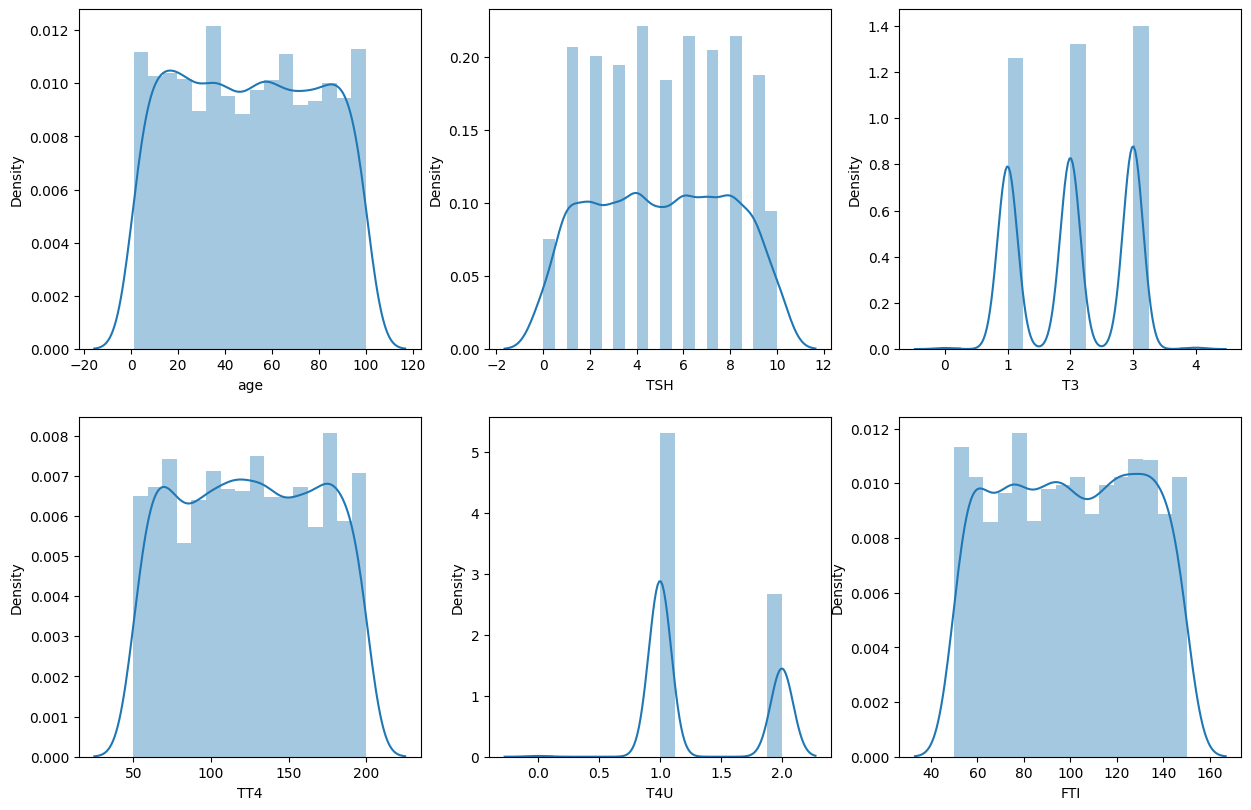

In [40]:
## For checking the distribution for our continuous data in the dataset.


columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(new_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

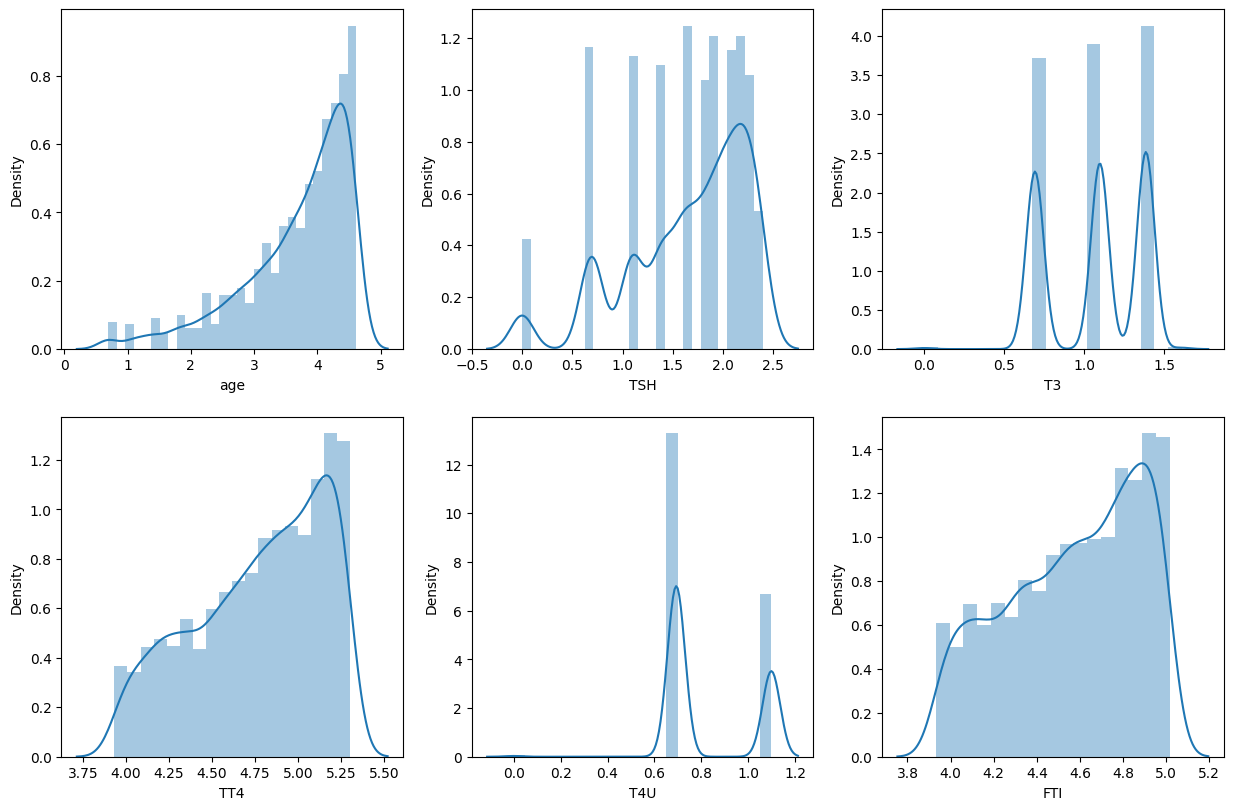

In [41]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [42]:
new_data = new_data.drop(['TSH'], axis = 1)


<Axes: xlabel='Class', ylabel='count'>

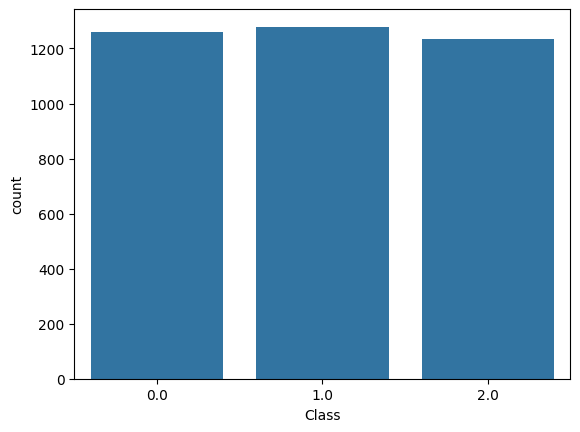

In [43]:
#countplot of class column to see the distribution
sns.countplot(data=new_data, x= 'Class')

In [44]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']


In [45]:
#For balancing the imbalance dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
rdsample=RandomOverSampler()

rdsample = RandomOverSampler()
x_sampled, y_sampled = rdsample.fit_resample(x, y)


In [46]:
#Checking for shape of x_sample
x_sampled.shape

(3837, 22)

In [47]:
#creating dataframe of x_sample
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source_SVI,referral_source_other
0,63.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,197.0,2.0,74.0,0.0,0.0
1,29.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,80.0,2.0,138.0,0.0,0.0
2,25.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,150.0,2.0,52.0,0.0,1.0
3,25.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,188.0,2.0,76.0,1.0,0.0
4,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,182.0,2.0,89.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,67.0,3.0,52.0,0.0,1.0
3833,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,159.0,3.0,95.0,0.0,0.0
3834,77.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,182.0,3.0,91.0,0.0,1.0
3835,29.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,144.0,2.0,118.0,0.0,1.0


<Axes: xlabel='Class', ylabel='count'>

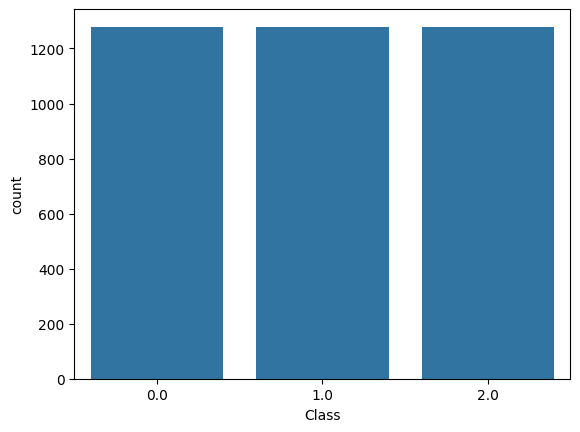

In [48]:
sns.countplot(data=new_data, x= y_sampled)

<Axes: >

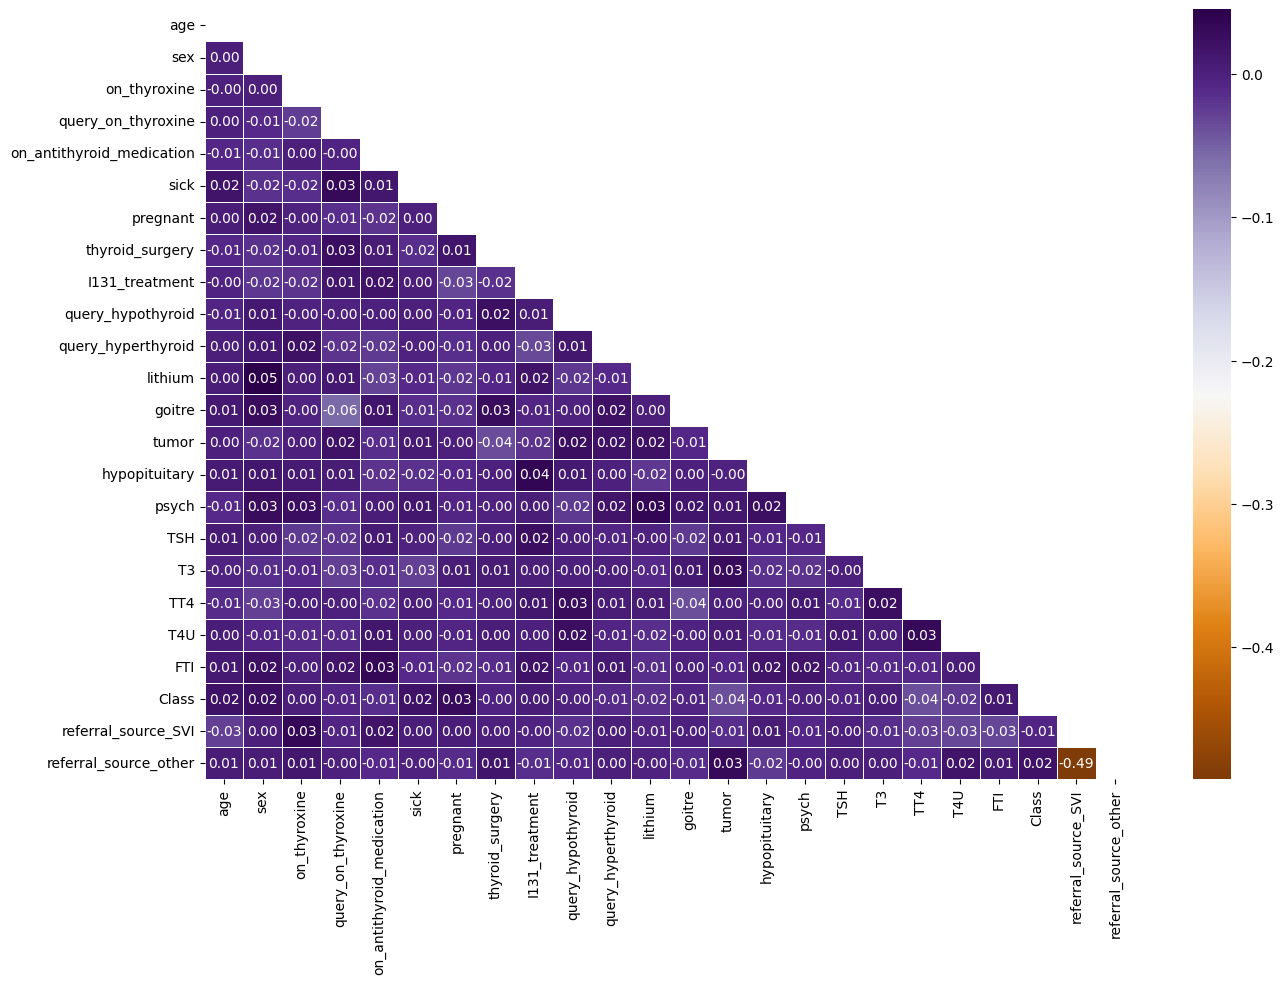

In [49]:
# Correlation Analysis Using Heatmap

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

In [50]:
#Splitting data into train and test for model building

X_train,X_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=0)


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Ensure y_train is one-hot encoded
y_train_encoded = to_categorical(y_train)

# Function to build ANN models
def build_ann_model(layers, activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in layers:
        model.add(Dense(units, activation=activation))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))  # Multi-class output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [52]:
# Define MLP Model
def mlp_classifier(X_train, X_test, y_train, y_test):
    mlp_model = build_ann_model([64, 32])
    mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
    test_loss, test_acc = mlp_model.evaluate(X_test, y_test)
    return f'Accuracy_Score: {test_acc}\n Train Score: {mlp_model.evaluate(X_train, y_train)[1]}\n Test Score: {test_acc}'

In [53]:
# Define FNN Model
def fnn_classifier(X_train, X_test, y_train, y_test):
    fnn_model = build_ann_model([128, 64, 32])
    fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
    test_loss, test_acc = fnn_model.evaluate(X_test, y_test)
    return f'Accuracy_Score: {test_acc}\n Train Score: {fnn_model.evaluate(X_train, y_train)[1]}\n Test Score: {test_acc}'


In [54]:
# Define DNN Model
def dnn_classifier(X_train, X_test, y_train, y_test):
    dnn_model = build_ann_model([256, 128, 64, 32])
    dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
    test_loss, test_acc = dnn_model.evaluate(X_test, y_test)
    return f'Accuracy_Score: {test_acc}\n Train Score: {dnn_model.evaluate(X_train, y_train)[1]}\n Test Score: {test_acc}'

In [55]:
# Define Autoencoder Model
def autoencoder_classifier(X_train, X_test, y_train, y_test):
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)

    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(), loss='mse')

    # Train Autoencoder
    autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, X_test))

    # Extract Encoder
    encoder = Model(input_layer, encoded)
    X_train_encoded = encoder.predict(X_train)
    X_test_encoded = encoder.predict(X_test)

    # Define Classifier with Correct Input Shape (64 Features)
    classifier = Sequential([
        Input(shape=(64,)),  # Adjusted input shape
        Dense(32, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
    ])

    classifier.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    # Train Classifier
    classifier.fit(X_train_encoded, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_encoded, y_test))
    test_loss, test_acc = classifier.evaluate(X_test_encoded, y_test)

    return f'Accuracy_Score: {test_acc}\n Train Score: {classifier.evaluate(X_train_encoded, y_train)[1]}\n Test Score: {test_acc}'



In [56]:
# Define Different ANN Models
models = {
    "MLP": build_ann_model([64, 32]),
    "FNN": build_ann_model([128, 64, 32]),
    "DNN": build_ann_model([256, 128, 64, 32]),
    "Autoencoder": autoencoder_classifier  # Ensure autoencoder_classifier is defined
}


In [57]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Sample dataset for demonstration (adjust to your real dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# MLP Classifier
def mlp_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')  # 4 classes -> softmax activation
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model.evaluate(X_test, y_test, verbose=0)

# FNN Classifier
def fnn_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model.evaluate(X_test, y_test, verbose=0)

# DNN Classifier
def dnn_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model.evaluate(X_test, y_test, verbose=0)

# Autoencoder Classifier
def autoencoder_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model.evaluate(X_test, y_test, verbose=0)

# Evaluation function
def print_score(X_train, X_test, y_train, y_test):
    print("MLP:\n")
    result0 = mlp_classifier(X_train, X_test, y_train, y_test)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(result0[0], result0[1]))
    print("-" * 100)

    print("FNN:\n")
    result1 = fnn_classifier(X_train, X_test, y_train, y_test)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(result1[0], result1[1]))
    print("-" * 100)

    print("DNN:\n")
    result2 = dnn_classifier(X_train, X_test, y_train, y_test)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(result2[0], result2[1]))
    print("-" * 100)

    print("Autoencoder:\n")
    result3 = autoencoder_classifier(X_train, X_test, y_train, y_test)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(result3[0], result3[1]))
    print("-" * 100)

# Run all classifiers
print_score(X_train, X_test, y_train, y_test)


MLP:

Loss: 0.6556, Accuracy: 0.7700
----------------------------------------------------------------------------------------------------
FNN:

Loss: 0.5649, Accuracy: 0.8100
----------------------------------------------------------------------------------------------------
DNN:

Loss: 0.4910, Accuracy: 0.7900
----------------------------------------------------------------------------------------------------
Autoencoder:

Loss: 0.4010, Accuracy: 0.8533
----------------------------------------------------------------------------------------------------


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Sample dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# Improved MLP Classifier
def improved_mlp_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(4, activation='softmax')  # 4 classes -> softmax activation
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Early stopping and learning rate adjustment
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, lr_scheduler],
                        verbose=1)

    return model.evaluate(X_test, y_test, verbose=0)

# Evaluate the improved MLP
result = improved_mlp_classifier(X_train, X_test, y_train, y_test)
print("Improved MLP Classifier -> Loss: {:.4f}, Accuracy: {:.4f}".format(result[0], result[1]))

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2645 - loss: 1.9696 - val_accuracy: 0.5033 - val_loss: 1.2237 - learning_rate: 0.0010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4475 - loss: 1.3637 - val_accuracy: 0.6267 - val_loss: 1.0459 - learning_rate: 0.0010
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5230 - loss: 1.1733 - val_accuracy: 0.6500 - val_loss: 0.9478 - learning_rate: 0.0010
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5965 - loss: 1.0158 - val_accuracy: 0.6733 - val_loss: 0.8848 - learning_rate: 0.0010
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5833 - loss: 1.0401 - val_accuracy: 0.6933 - val_loss: 0.8274 - learning_rate: 0.0010
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5791 - loss: 1.0423 - val_accuracy: 0.7100 - val_loss: 0.7818 - learning_rate: 0.0010
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6585 - loss: 0.8994 - val_

In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/synthetic_hypothyroid_3772.csv"
df = pd.read_csv(file_path)

# Check unique values in "Class" column
print("Unique Classes:", df["Class"].unique())

# Preprocessing
df.replace("?", np.nan, inplace=True)
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

binary_cols = df.columns[2:28]
df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})
df["sex"] = df["sex"].replace({"F": 0, "M": 1})

# Encode multi-class labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

df.drop(columns=["referral_source", "TBG"], inplace=True)
df.fillna(df.median(), inplace=True)

# Train-test split
X = df.drop(columns=["Class"]).values
y = df["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define Improved LSTM + MLP Model
model = Sequential([
    LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(100),
    BatchNormalization(),
    Dense(200),
    LeakyReLU(),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)

# Train Model
history = model.fit(X_train, y_train, epochs=200, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Model: Adam, LeakyReLU, Epochs: 200, Batch: 64")
print(f"Improved MLP + LSTM Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Unique Classes: ['hyperthyroid' 'hypothyroid' 'negative']
Epoch 1/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.3273 - loss: 1.1433 - val_accuracy: 0.3232 - val_loss: 1.0988 - learning_rate: 0.0010
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.3333 - loss: 1.1160 - val_accuracy: 0.3192 - val_loss: 1.0986 - learning_rate: 0.0010
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.3315 - loss: 1.1053 - val_accuracy: 0.3364 - val_loss: 1.0988 - learning_rate: 0.0010
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.3238 - loss: 1.1061 - val_accuracy: 0.3404 - val_loss: 1.0985 - learning_rate: 0.0010
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.3416 - loss: 1.1046 - val_accuracy: 0.3457 - val_loss: 1.0984 - learning_rate: 0.0010
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.3377 - loss: 1.1023 - val_accuracy: 0.3497 - val_loss: 1.0981 - learning_rate: 0.0010
Epoch 7/200
48/48 ━━━━━

In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/synthetic_hypothyroid_3772.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Check unique values in "Class" column
print("Unique Classes:", df["Class"].unique())

# Preprocessing
df.replace("?", np.nan, inplace=True)
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

binary_cols = df.columns[2:28]
df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})
df["sex"] = df["sex"].replace({"F": 0, "M": 1})

# Encode multi-class labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

df.drop(columns=["referral_source", "TBG"], inplace=True)
df.fillna(df.median(), inplace=True)

# Train-test split
X = df.drop(columns=["Class"]).values
y = df["Class"].values  # Multi-class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define MLP + LSTM Model with Leaky ReLU for Multi-Class
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(100),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)  # Convert probabilities to class labels

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("model:Adam ,leakyRelu ,epoch:50 ,Batch:32")
print(f"MLP + LSTM Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Unique Classes: ['hyperthyroid' 'hypothyroid' 'negative']
Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.3302 - loss: 1.0997 - val_accuracy: 0.3497 - val_loss: 1.0985
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3643 - loss: 1.0975 - val_accuracy: 0.3377 - val_loss: 1.0983
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3177 - loss: 1.0993 - val_accuracy: 0.3523 - val_loss: 1.0975
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3474 - loss: 1.0981 - val_accuracy: 0.3404 - val_loss: 1.0977
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3388 - loss: 1.0989 - val_accuracy: 0.3563 - val_loss: 1.0972
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3743 - loss: 1.0973 - val_accuracy: 0.3563 - val_loss: 1.0982
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3566 - loss: 1.0981 - val_accuracy: 0.3550 - val_loss: 1.0973
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - 

In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/synthetic_hypothyroid_3772.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Check unique values in "Class" column
print("Unique Classes:", df["Class"].unique())

# Preprocessing
df.replace("?", np.nan, inplace=True)
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

binary_cols = df.columns[2:28]
df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})
df["sex"] = df["sex"].replace({"F": 0, "M": 1})

# Encode multi-class labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

df.drop(columns=["referral_source", "TBG"], inplace=True)
df.fillna(df.median(), inplace=True)

# Train-test split
X = df.drop(columns=["Class"]).values
y = df["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define MLP + LSTM Model with Leaky ReLU and Dropout for Multi-Class
model = Sequential([
    LSTM(120, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.4),
    LSTM(60),
    Dropout(0.4),
    Dense(150),
    LeakyReLU(alpha=0.2),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile Model
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train Model
history = model.fit(X_train, y_train, epochs=75, batch_size=128, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("model:RMSprop ,leakyRelu ,epoch:75 ,Batch:128")
print(f"MLP + LSTM Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Unique Classes: ['hyperthyroid' 'hypothyroid' 'negative']
Epoch 1/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.3490 - loss: 1.0991 - val_accuracy: 0.3695 - val_loss: 1.0979
Epoch 2/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.3410 - loss: 1.0987 - val_accuracy: 0.3470 - val_loss: 1.0977
Epoch 3/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.3464 - loss: 1.0991 - val_accuracy: 0.3550 - val_loss: 1.0978
Epoch 4/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.3578 - loss: 1.0978 - val_accuracy: 0.3457 - val_loss: 1.0977
Epoch 5/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.3507 - loss: 1.0987 - val_accuracy: 0.3603 - val_loss: 1.0973
Epoch 6/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.3416 - loss: 1.0984 - val_accuracy: 0.3656 - val_loss: 1.0972
Epoch 7/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.3450 - loss: 1.0985 - val_accuracy: 0.3523 - val_loss: 1.0971
Epoch 8/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 163m